# Part 2.b

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Concatenate the data into 1 dataframe for the remainder of the analysis.

In [2]:
year_2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')
year_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')

In [3]:
df = pd.concat([year_2000, year_2001])
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,"{'id': 1118731, 'name': 'Tom and Jerry Collect...",50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,136536687.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.897,2213.0,PG
2,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,"{'id': 1118731, 'name': 'Tom and Jerry Collect...",50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,136536687.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.897,2213.0,PG
3,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,"{'id': 1118731, 'name': 'Tom and Jerry Collect...",50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,136536687.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.897,2213.0,PG
4,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,"{'id': 1118731, 'name': 'Tom and Jerry Collect...",50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,136536687.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.897,2213.0,PG


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18226 entries, 0 to 7782
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                18226 non-null  object 
 1   adult                  18224 non-null  float64
 2   backdrop_path          15774 non-null  object 
 3   belongs_to_collection  8477 non-null   object 
 4   budget                 18224 non-null  float64
 5   genres                 18224 non-null  object 
 6   homepage               13935 non-null  object 
 7   id                     18224 non-null  float64
 8   original_language      18224 non-null  object 
 9   original_title         18224 non-null  object 
 10  overview               17878 non-null  object 
 11  popularity             18224 non-null  float64
 12  poster_path            17597 non-null  object 
 13  production_companies   18224 non-null  object 
 14  production_countries   18224 non-null  object 
 15  rel

In [5]:
df.duplicated().sum()

13704

In [6]:
df.drop_duplicates(inplace=True)

### How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

In [7]:
# budget = df['budget'] > 0
# revenue = df['revenue'] > 0
# financial_filter = df.loc[budget | revenue]

In [8]:
filter_financial = (df['budget'] > 0) | (df['revenue']>0)
filter_financial.value_counts()

False    3780
True      742
dtype: int64

In [9]:
plot_df = df[filter_financial].copy()

### How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [10]:
## to order them (optional)
cert_order = ['G','PG','PG-13','R','NR']

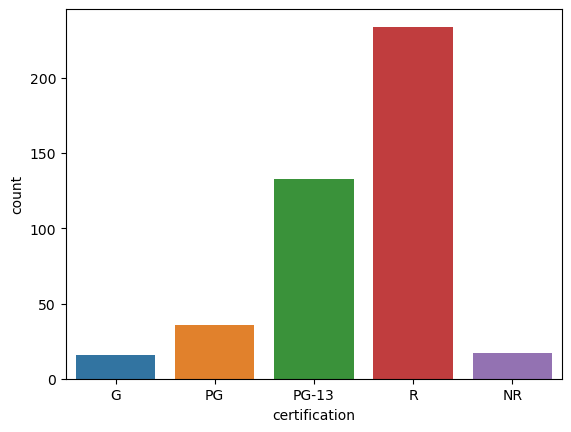

In [11]:
sns.countplot(data=plot_df, x='certification',order=cert_order);

### What is the average revenue per certification category?

In [12]:
df.groupby(['certification'])['revenue'].apply(lambda x:x.mean())

certification
G          6.520264e+07
NC-17      1.668286e+03
NR         2.116980e+06
PG         5.810079e+07
PG-13      7.131692e+07
R          1.583423e+07
Unrated    0.000000e+00
Name: revenue, dtype: float64

### What is the average budget per certification category?

In [13]:
bud = df.groupby(['certification'])['budget'].apply(lambda x:x.mean())
bud

certification
G          2.123532e+07
NC-17      0.000000e+00
NR         1.391430e+06
PG         2.346373e+07
PG-13      3.076988e+07
R          9.577320e+06
Unrated    0.000000e+00
Name: budget, dtype: float64

## Data was collected from TMBD
https://www.themoviedb.org/about/logos-attribution